# Jupyter

[See Jupyter's official onboarding](https://jupyter.org/try-jupyter/notebooks/?path=notebooks/Intro.ipynb) for a more interactive explantion of the software and it's features.

Jupyter is a software for running notebooks that can be used to run various types of code in various programming languages, although jupyter itself is mostly written in javascript, the `kernels` can be set up to process essentially any language, the most common language used within jupyter is python.  

Although Jupyter defines the standard for the notebook format, other software, such as Google's Colab, and Azure Data Studio, are compatible with that defined notebook format, meaning notebooks can be run from within them and the resulting `.ipynb` files will be transferrable. If you open a `.ipynb` file in a plain text editor like notepad, you may notice that it's structure is based on another format called `.json`. The fact that Notebooks are stored in plain text makes them very accessible to programming languages, which is an added bonus that means you can essentially produce scripts that produce scripts. 

In addition to colab, there are a number of online resources available to run notebooks, most of which cost money to utilize compute power for. One of the more interesting recent developments is [jupyterlite](https://jupyter.org/try-jupyter/lab/) which allows you to run jupyter out of your browser without the need to perform a full install of conda or subscribe to a service. Due to it being WASM based, it has some limited functionality like only being able to install `pure python` packages due to it utilizing the `pyodide` kernal. For the most part, I recommend users to utlize Anaconda's distribution of jupyter server to run jupyter notebooks. Although not the most beginner friendly, it typically provides the most robust and transferrable experience.

## Outputting Jupyter Notebooks as a pdf

Jupyter Notebooks are great for sharing processes, but being so easily to alter makes them difficult for processes like preparing deliverables and QA/QC. For these types of tasks, it's often better to output your notebooks as a pdf.

See the `jupyter.py` file within `civilpy.general` for an example of a scriptable way to convert these notebooks to presentable .pdf formats to preserve a record of what was run and the resulting outputs (important for QA/QC proceedures).

Note that by using the `TagRemovePreprocessor` command in the script we can remove any cells we want from the output by using a tag named `remove_cell` which removes both the input and the output. We can remove just the input with the `remove_input` tag, or just the output by using the `remove_output` tags. These tags can be customized to your liking by modifying the `civilpy.general.notebook_to_pdf` function, but for ease of use, it's generally best to stick with the established tags.

<div class="alert alert-block alert-info">
<b>Tip:</b> To quickly get the path of a notebook from file explorer, you can hold <kbd>Shift</kbd>, right click the file and select <b><tt>copy as path</tt></b>. 
Remember that python isn't able to handle windows paths in a string, so you either have to escape each <tt>\</tt> character by making it <tt>\\\\</tt>, or use an <tt>r''</tt> string like below,
</div>

In [1]:
from civilpy.general.jupyter import notebook_to_pdf

# Replace this with the correct path to your notebook, the pdf will be generated in the same folder
notebook_to_pdf(
    r"D:\Jetbrains\PycharmProjects\civilpy\Notebooks\1. Intro to Jupyter and Python.ipynb"
)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Jetbrains\\PycharmProjects\\civilpy\\Notebooks\\1. Intro to Jupyter and Python.ipynb'

## Anaconda

To get started with anaconda, [view the installation instructions here.](https://docs.anaconda.com/free/anaconda/install/index.html)

## Environments

Probably the largest struggle for new python users is setting up and configuring environments, Anaconda and it's primary tool conda, are one of the many attempts that exist to solve the confusion of setting up environments for new users. Because it can be difficult to know how to set up a python environment, the author has set up python library containing most of the packages civil engineers are going to need. To install this package open the `Anaconda Prompt` application that's on your computer after installing anaconda and run the following lines of code one at a time. Generally it's bad practice to execute code when you don't understand what it's doing, so I've provided a description of each step as well. See also the [Conda Cheat Sheet](https://docs.conda.io/projects/conda/en/4.6.0/_downloads/52a95608c49671267e40c689e0bc00ca/conda-cheatsheet.pdf) available from the conda docs website for a more extensive list of commands you can access in conda.


Create a new python environment named civilpy using python version 3.10;

```powershell
(base) C:/UserFolder> conda create -n civilpy python=3.10
```

Activate that environment;

```powershell
(base) C:/UserFolder> conda activate civilpy
```

Install the civilpy package from pip (This will take a while, but only has to be done the first time you set up an environment. If the `civilpy[full]` install fails you might have better luck with the standard `pip install civilpy` command. 

```powershell
(civilpy) C:/UserFolder> pip install civilpy[full]
```

Once it's done installing run;

```powershell
(civilpy) C:/UserFolder> jupyter lab
```

Your browser should automatically open to the jupyter interface. if it does not, look for the line in your terminal that's similar to 

```powershell
    To access the server, open this file in a browser:
        file:///C:/Users/dane.parks/AppData/Roaming/jupyter/runtime/jpserver-48008-open.html
    Or copy and paste one of these URLs:
        http://localhost:8888/lab?token=####a#a##a####a##a#aaaa#aaa#a#########
        http://127.0.0.1:8888/lab?token=####a#a##a####a##a#aaaa#aaa#a#########
```

if jupyter ever asks you for a password, it's the token values it prints out in this terminal output. Note that in order to use jupyter in your browser, you must allow this process to continue to run in the background while you're using it. If you want to kill the process and end your session (save your files first) you can either close the "Anaconda Prompt" window, or use the `ctl+c` shortcut in the terminal to stop the server (usually have to press it a couple times).

Note that jupyter will start running in whatever folder you run the `jupyter lab` command in, so if you have a folder for your notebooks, you may want to run `cd C:\Path\To\Your\Notebook\Directory` before running `jupyter lab` in order to be able to view them. If you don't want the full jupyter lab application, which includes features like the file explorer to the left side of the screen, you can also run a notebook server with the command `jupyter notebook`.

## Cells

There are [three primary types of cells](https://www.datacamp.com/tutorial/tutorial-jupyter-notebook#:~:text=A%20Jupyter%20Notebook%20consists%20of,images%2C%20links%2C%20and%20equations.) in a jupyter notebook. `Markdown` cells specialize in text formatting, and are generally used for documentation and explaining your code / thought processes. `Code` cells contain python (or any other kernel type) code and execute the code within the cell almost exactly like if you had typed the same code in the terminal. Lastly `raw` cells also generally contain code, but code that you don't actually want the interpreter to process/run.

Both `code` and `raw` cells are pretty self explanatory (although the code within them is generally the most complex aspect of the notebook) because of that, I don't cover them very extensively. Rather most of the remaining aspects of jupyter notebooks described below is focused on the `markdown` cell type with the exception of a brief description of cell magicks.

In [29]:
# code cells run python like typing it into the terminal
x = 5
print(x)

5


### Code Cells

as mentioned, python code cells are both self explanatory enough and complicated enough that there's not much value in digging into them here. I will briefly explain [magics](https://ipython.readthedocs.io/en/stable/interactive/magics.html) though because they're something that's unique to jupyter notebook code cells. Cell magics basically extend the functionality of jupyter code cells to all them to do additional tasks. They are denoted by the `%%` and line magics are denoted by `%` symbols. They provide similar but slightly varying functions. See the link for a full list of magics, I've only included the ones I find myself using the most here.

#### Line Magics `%`

In [32]:
# %cd - allows you to change the current working directory
%cd ..

C:\Users\dane.parks\PycharmProjects\civilpy


In [33]:
%cd Notebooks

C:\Users\dane.parks\PycharmProjects\civilpy\Notebooks


In [35]:
# %pip - allows you to install packages directly from jupyter cells
%pip install requests

Note: you may need to restart the kernel to use updated packages.


In [36]:
# %debug - activates the interactive debugger
%debug x=3

NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> <string>(1)<module>()



ipdb>  c


In [44]:
# %env - access environemnt variables
%env USERNAME

'Dane.Parks'

In [46]:
# %lsmagic - display available magics
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %code_wrap  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %mamba  %matplotlib  %micromamba  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%code_wrap  %%debug  %%file  %%html  %%ignore_errors  %%javascrip

In [48]:
# %pdoc - print the docstring for an object
from civilpy.structural.steel import W

%pdoc W

Class docstring:
    Class to provide more specific attributes and functions related to designing
    with steel W s. Splitting values into multiple classes allows dropping
    of empty values in the database.
    
    >>> t = W("W36X150")
    >>> t.weight
    150.0 pound/foot
Init docstring:
    Initialize self.  See help(type(self)) for accurate signature.

In [56]:
from math import pi

# %precision - set pprint floating point precision
%precision 3
pi

3.142

In [58]:
%precision 7
print(pi)  # Note it doesn't work with print function
pi

3.141592653589793


3.1415927

In [59]:
# %pwd - displays present working directory
%pwd

'C:\\Users\\dane.parks\\PycharmProjects\\civilpy\\Notebooks'

In [61]:
# %time - Times the exection of a function
n = 1_000_000
%time sum(range(n))

CPU times: total: 31.2 ms
Wall time: 22.9 ms


499999500000

#### Cell Magics `%%`

the `%%Command` must be the first line of the cell or it doesn't work.

`%%bash` - allows you to run bash commands from jupyter

In [94]:
%%bash
echo "$USER"

dane


`%%html` - renders the cell as html

In [108]:
%%html
<!DOCTYPE html>
<html>
<body>

Demo JavaScript in Body

<p id="demo">A Paragraph.</p>

<button type="button" onclick="myFunction()">Try it</button>

<script>
function myFunction() {
  document.getElementById("demo").innerHTML = "Paragraph changed.";
}
</script>

</body>
</html> 

`%%javascript` - render the block as javascript

In [1]:
%%javascript
window.alert("Testing JavaScript Alert Function, Okay to Close");

<IPython.core.display.Javascript object>

`%%latex` - Render the cell as latex

In [124]:
%%latex
$$
\frac{1}{3}\
$$

<IPython.core.display.Latex object>

`%%markdown` - Renders the cell as markdown

In [125]:
%%markdown
**Bold Text**<br>*Itallic Text*

**Bold Text**<br>*Itallic Text*


### Markdown Cells

#### Mathjax

Markdown cells allow for text formatting. One of the most useful features of markdown in jupyter for civil engineers is the inclusion of mathjax. So formulas can be written in mathjax syntax;

The code `$$ x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} $$` produces;

$$ x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} $$

Note that it's centered, to use mathjax keywords in-line, use single `$` symbols, `$\pi$` produces $\pi$.

for a fairly comprehensive list of mathjax symbols and features, [check here.](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference)

#### Headings 

Heading symbols `#` determine the organizational format of your notebook. Note that when you export your notebook to .pdf, bookmarks will be created based on your headings. A single `#` produces top-level headings which will be numbered 1, 2, 3 etc. while `##` will produce 1.1, 1.2, 1.3, 1.4 etc. Jupyter supports up to 4 levels of headers (`####`/1.1.1.1).

#### Emphasis

Bold text is created using `__text__` or `**text**` **example**

Italic text is created using `_text_` or `*text*` *example*

#### Monospace Font

Monospace font is created using backtick symbols `` `text` `` `example` 

further, code can be demonstrated using triple back ticks `` ```text``` `` which allows for multiline code blocks.

if you want specific syntax highlighting, you can specify it at the start of the code block, ie, `` ```python ``

```python
x = 3
values = [1, 2, 3, 4, 5, 6]

def new_function():
    for x in values:
        x = x + 1
    return x
```

<a id="HTML_TAGS"></a>

#### HTML Tags

Lots of html tags can be embedded within markdown for additional control. For instance `<b>text</b>` can be used in place of `**text**` to create bold text, using the `<br>` tag will result in line breaks, for<br>example.

Anchor tags can be used to identify cells and later refrence them, so adding an html anchor tag: `<a id="Target_Cell"></a>` can be referenced later on using the syntax `[link text](#Target_Cell)`

`<H1>Header</H1>` tags perform the same function as `#` symbols

`<table>` tags can be used;

<table>
    <tr>
        <td>Column 1</td>
        <td>Column 2</td>
    </tr>
    <tr>
        <td>second</td>
        <td>row</td>
    </tr>
</table>

`<details>` element with a `<summary>` inside can be utilized to create a [disclosure widget](https://developer.mozilla.org/en-US/docs/Web/HTML/Element/details)

<details>
  <summary>Details</summary>
  Something small enough to escape casual notice.
</details>

Subscripts and super scripts can be created in mathjax with `$x^2$` or `$x_2$` or by utilizing `<sup>` or `<sub>` resulting in slightly different results;

mathjax;

$x^2$ $x_2$

or HTML;

x<sup>2</sup> x<sub>2</sub>

`<ins>` text creates <ins>inserted</ins> text and `<del>` produces <del>deleted</del> text. Strikethrough text can also be created with `~~strikethrough~~` which results in ~~strikethrough~~ text.

[Definition tags](https://www.w3schools.com/tags/tag_dl.asp) `<dl>` `<dt>` and `<dd>` are often used in dictionary like word defintions,

<dl>
  <dt>Coffee</dt>
  <dd>Black hot drink</dd>
  <dt>Milk</dt>
  <dd>White cold drink</dd>
</dl>

Emojis are available using a variety of options, see the [em0ji cheat sheet](https://www.webfx.com/tools/emoji-cheat-sheet/)

`:nauseated_face:` sometimes produces 🤢 depending on the renderer, but often in jupyter you can just paste it in.

#### Links

Links are produced by using `[link text](link_target)` syntax, like the [emoji cheat sheet](https://www.webfx.com/tools/emoji-cheat-sheet/) link above.

as mentioned previously, links to document sections can be produced by `[link text](#section_id)` [like so](#HTML_TAGS).

#### Images

images can be included 3 different ways, linking to a web resource `![octocat](https://avatars.githubusercontent.com/u/583231?v=4)` Produces; 

![octocat](https://avatars.githubusercontent.com/u/583231?v=4)

Local files (note if you output your notebook as html file, you'll need to send these files along with the html file or the linking will break)

`![centroid_of_an_angle](./res/imgs/centroid.jpg)` produces

![centroid_of_an_angle](./res/imgs/centroid.jpg)

`<img src='./res/imgs/cat.png'>` produces

<img src='./res/imgs/cat.png'>

and you can also utilize a python code like so;

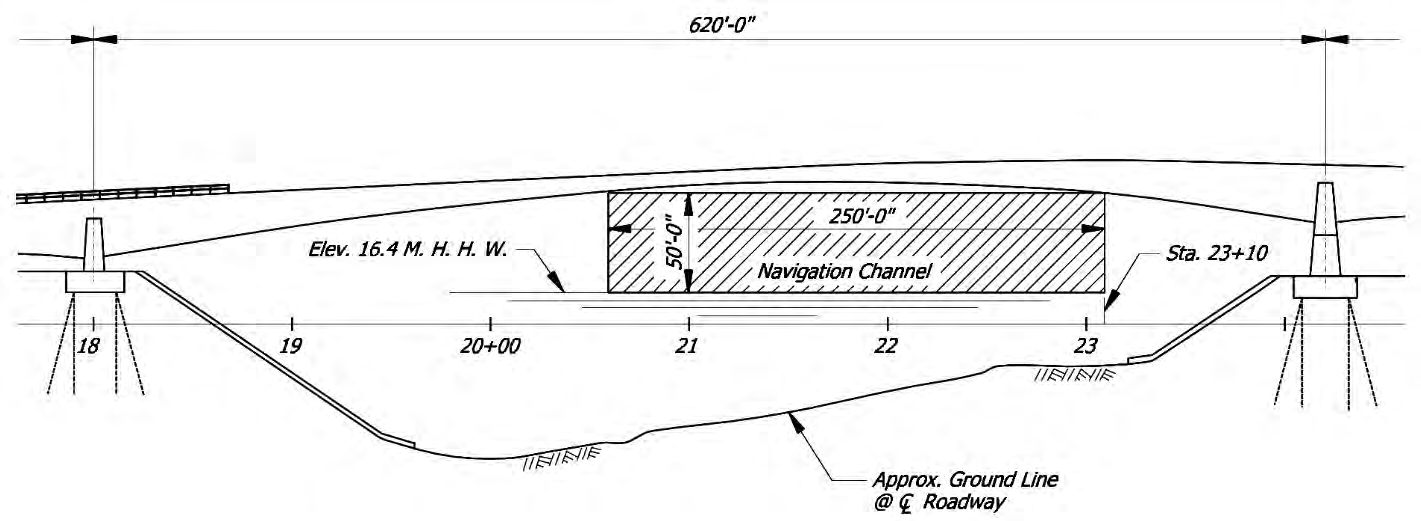

In [131]:
from IPython.display import Image

Image(filename="./res/imgs/image168_1.png")

Note that all the above options will have different results if you plan to output your notebook to html or pdf and should be selected accordingly.

#### Lists

bulleted lists can be created by starting each line with the `-` symbol.

- first item
- second item
- third item

numbered lists can be created using `1.` note that you don't have to keep track of the number, jupyter will figure out the correct numbers on rendering.

1. first item
1. second item
1. third item

to create sub items, you can use indent the second line of the list

1. First Item
    1. item 1a
    1. item 1b
    1. item 1c
2. Second Item

or,

- first line
    - second line

#### Alert Boxes

the following code can be used to create alert boxes,

```html
<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes. 
If it’s a note, you don’t have to include the word “Note”.
</div>
```

produces blue boxes (alert-info);

<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes. 
If it’s a note, you don’t have to include the word “Note”.
</div>

```html
<div class="alert alert-block alert-warning">
<b>Example:</b> Use yellow boxes for examples that are not 
inside code cells, or use for mathematical formulas if needed.
</div>
```

produces yellow boxes (alert-warning);

<div class="alert alert-block alert-warning">
<b>Example:</b> Use yellow boxes for examples that are not 
inside code cells, or use for mathematical formulas if needed.
</div>

```html
<div class="alert alert-block alert-success">
<b>Up to you:</b> Use green boxes sparingly, and only for some specific 
purpose that the other boxes can't cover. For example, if you have a lot 
of related content to link to, maybe you decide to use green boxes for 
related links from each section of a notebook.
</div>
```

produces green boxes (alert-success);

<div class="alert alert-block alert-success">
<b>Up to you:</b> Use green boxes sparingly, and only for some specific 
purpose that the other boxes can't cover. For example, if you have a lot 
of related content to link to, maybe you decide to use green boxes for 
related links from each section of a notebook.
</div>

```html
<div class="alert alert-block alert-danger">
<b>Just don't:</b> In general, avoid the red boxes. These should only be
used for actions that might cause data loss or another major issue.
</div>
```

produces red boxes (alert-danger);

<div class="alert alert-block alert-danger">
<b>Just don't:</b> In general, avoid the red boxes. These should only be
used for actions that might cause data loss or another major issue.
</div>

#### Geometric Shapes

[see this list for reference numbers](https://www.w3schools.com/charsets/ref_utf_geometric.asp)

&#9637; is produced by `&#9637;`

&#x25A6; is produced by `&#x25A6;`

#### Horizontal Lines

`***` produces;

***

# Python

**Not in anyway affiliated with AlphaWaveData, just had a good resource on GitHub under an MIT License so I started with their file**

Instruction, media content, examples and links to resources that will help you build a foundation for Python competency. Jupyter Notebooks are available on [Google Colab](https://colab.research.google.com/drive/1tdQkjNdHGJ7wTMvO_bhp3aM5k3ZR3eEx?usp=sharing) and [Github](https://github.com/AlphaWaveData/Jupyter-Notebooks/blob/master/Learn%20Python%20Variables%20and%20Data%20Types.ipynb).

## SINGLE DATA TYPES

### Prerequisite knowledge
- variable assignment using a single equals `=`
- variables must use letters first and not numbers e.g. `var_1` and not `1_var`
- there are reserved words that cannot be used such as `print`, `str`, `int`....


**Web Resources**

[Docs.python.org - Numbers Data Types](https://docs.python.org/3/tutorial/introduction.html#numbers)  
[Docs.python.org - Strings Data Types](https://docs.python.org/3/tutorial/introduction.html#strings)  
[Docs.python.org - Lists Data Types](https://docs.python.org/3/tutorial/introduction.html#lists)  
[Docs.python.org - Dictionary Data Types](https://docs.python.org/3/tutorial/datastructures.html#dictionaries)

### STRINGS

#### What is a String?
A string is a data type that is used to represent text rather than numbers and is composed of a set of characters and can also contain spaces and numbers.

#### Why do we use Strings?
Strings are useful when storing small or large bodies from single words to full sentences. 

#### How do we use Strings?
Strings are assigned to variables using a single equals and are surrounded by triple quotes `""" """`, double quotes `" "` or single quotes `' '`, although triple quotes are generally used for function doc strings so please use the single or double quotes.

#### Creating a String

In [1]:
string_1 = """This is a string"""  # triple quote
string_2 = "this is another string"  # double quote
string_3 = "this is also a string"  # single quote

print(string_3)
type(string_1)

this is also a string


str

#### Indexing a String

It is possible to index a string by referencing the position (or index) of a single character, or by referencing a range with a start and end position. Note: indexes start at where the first element is 0.

In [2]:
print(string_1)
print(string_1[0])
print(string_1[5:-3])

This is a string
T
is a str


### INTEGERS or INTs

#### What is an Integer?

An integer is a whole number (not a fraction) that can be positive, negative or zero.

#### Why do we use Integers?

Integers are a commonly used data type in programming as they are efficient to store and are generally used in loops and indexing strings or lists. 

#### How do we use Integers?

Integers are assigned to variables using a single equals and are standalone numbers without a decimal point or an operation that does not return a whole number.

In [3]:
int_1 = 1
int_2 = -2
int_3 = 10 / 2

print(int_1, int_2)
type(int_1)

1 -2


int

### FLOATING-POINT NUMBERS or FLOATS

#### What is a Float?

A float is a floating-point number that contains a decimal point. Compared to Integers, they require more space in memory as you will have two integers separated by a decimal point.

#### Why do we use Floats?

Computers recognize real numbers that contain fractions as floating point numbers. Floats are useful for numbers that require a great deal of precision, such as calculations in engineering or microchip manufacturing.

#### How do we use Floats?

Floats are assigned to variables using a single equals and are standalone numbers that contain a decimal point or the result of an operation that returns a decimal number.

In [4]:
float_1 = 1.0
float_2 = 3 / 1
print(float_1, float_2)
type(float_1)

1.0 3.0


float

## BASIC DATA STRUCTURES

Now that we have covered single variables being strings, ints and floats, there is another class of variables which store one or more single variables.

These are Lists, Dictionaries and Tuples. More information can be found in the python documentation:  

https://docs.python.org/3/tutorial/datastructures.html

### LISTS

#### What is a List?

Lists are data structures that contain an ordered collection of elements. These elements are generally of the same type and can contain elements such as single data types through to more complex data structures such as other lists or dictionaries.

#### Why do we use Lists?
Lists are commonly used in programming to store and organize data so it can be easily sorted, indexed or searched.

#### How do we use Lists?

Lists are assigned to variables using a single equals, are denoted by square brackets, and use a comma to separate elements `[a,b]`.

#### Creating a List

There are two main ways of creating a list. First is to use square brackets,`a=[]` and the second is to use the list type cast `b=list()`.

In [5]:
list_1 = ["string item", float_1, 100]
list_a = list()
print(list_1)
type(list_1)

['string item', 1.0, 100]


list

#### Adding an item to a List

Now that we have our list, you can add another element using the python's inbuilt `.append()` method.

In [6]:
list_1.append("new element")
print(list_1)
type(list_1)

['string item', 1.0, 100, 'new element']


list

#### Changing an item in a List

When changing an item in a list, you need to know the position of the item denoted by the index.

In [7]:
list_1[1] = "Changed Item"

print(list_1)

['string item', 'Changed Item', 100, 'new element']


#### Removing an item from a List

To remove an item from a list, use the `.pop()` method.

In [8]:
list_1.pop(0)
print(list_1)

['Changed Item', 100, 'new element']


#### Merging two Lists

There are two ways you can merge two lists. First is to append using `.append(element)` which will add the new elements to the end of the old list.

In [9]:
list_2 = ["this", "is", "a", "list"]
list_1.append(list_2)
print(list_1)

['Changed Item', 100, 'new element', ['this', 'is', 'a', 'list']]


The other way is to insert a list as an element within the list (note: not append but inject) using the `.insert(index, element)` method.

In [10]:
list_3 = [1, 2, 3, 4]
list_4 = [5, 6, 7, 8]
list_3.insert(2, list_4)
print(list_3)

[1, 2, [5, 6, 7, 8], 3, 4]


#### Accessing items in a List ###
You can access list items by referring to the index number of the item. Note: Lists start with an index of 0. 

You can also use negative indexing to access items from back to front. E.g. -1 is the last item in the list and -2 is second last.

In [11]:
print(list_1[0])
print(list_1[-1])

Changed Item
['this', 'is', 'a', 'list']


You can also reference index ranges by using the colon between indexes which refer to the start and end of the range e.g. `[start:end]` or if you omit a number on either start (or end), it will include everything from the start (or end) up until the end (or start) e.g. `[:end]` will include the first item until the end index item.

In [12]:
print(list_1[0:3])
print(list_1[2:])

['Changed Item', 100, 'new element']
['new element', ['this', 'is', 'a', 'list']]


#### List of Dictionaries

The below example illustrates how to create a list of dictionaries (a more complex data structure that will be covered below).

In [13]:
dict_a = {"key_1": "value_1", "key_2": "value_2"}
dict_b = {"key_3": "value_3", "key_4": "value_4"}
list_a = [dict_a, dict_b, dict_a]
print(list_a)
type(list_a)

[{'key_1': 'value_1', 'key_2': 'value_2'}, {'key_3': 'value_3', 'key_4': 'value_4'}, {'key_1': 'value_1', 'key_2': 'value_2'}]


list

We can also index this list to get the dictionary.

In [14]:
print(list_a[0])
type(list_a[0])

{'key_1': 'value_1', 'key_2': 'value_2'}


dict

#### List Comprehension

List comprehensions provide a concise way to create lists where each new element is the result of some operation applied to each member of another sequence or iterable. 

In [15]:
squares = [x**2 for x in range(10)]
print(squares)
type(squares)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


list

### TUPLES

#### What is a Tuple?

A tuple is a data structure that contains an ordered collection of elements that are immutable (unchangeable). These elements are generally of the same type and can contain elements such as single data types through to more complex data structures such as other lists or dictionaries.

#### Why do we use Tuples?

Tuples are commonly used in programming to store and organize data so it can be easily sorted, indexed or searched. Since tuples are immutable, we cannot add, change or remove elements.

#### How do we use Tuples?

Tuples are assigned to variables using a single equals and are denoted by round brackets and use a comma to separate elements `(a,b,c)`.

#### Creating a Tuple

In [16]:
tuple_1 = (1, 2, 3, 4)
print(tuple_1)
type(tuple_1)

(1, 2, 3, 4)


tuple

### Dictionaries

#### What is a Dictionary?

Dictionaries are data structures that contain a collection of "key" and "value" pairs where each key needs to be a unique string and the value can range from a single variable, to other data structures (such as another dictionary, or a list). If you attempt to add a new key1:value pair when the key1 already exists in the Dictionary, you should get a KeyExists error or risk overwriting the existing data. Since dictionaries can store single or complex data types as values, you can store two identical types in a list or dictionary structure. For example, a key with three identical values in a list key1:[value1,value1,value1] can be stored in a Dictionary.

#### Why do we use a Dictionary?

Dictionaries are commonly used in programming to store and organize data so it can be easily sorted, indexed or searched. Since dictionaries are mutable, we can add, change, or remove elements.

#### How do we use a Dictionary?

Dictionaries are assigned to variables using a single equals and are denoted by curly brackets and use a colon to separate key and value, and a comma to separate elements `{key1: value1, key2: value2}`.

#### Creating a Dictionary

There are two ways to create an empty dictionary - `my_dict = dict()` or `my_dict = {}`. 
The following example illustrates how to create a dictionary with keys and values.

In [17]:
dict_1 = {"key_1": "value_1", "key_2": "value_2"}

dict_2 = dict(key_100="item_100", key_101="item_101")
print(dict_1)
print(dict_2)
type(dict_1)

{'key_1': 'value_1', 'key_2': 'value_2'}
{'key_100': 'item_100', 'key_101': 'item_101'}


dict

#### Adding items to a Dictionary

Once we have created the dictionary data structure object, the below example shows how to add a new key, value pair where the value is a list from the above example.

In [18]:
dict_1["key_3"] = "value_3"
print(dict_1)

{'key_1': 'value_1', 'key_2': 'value_2', 'key_3': 'value_3'}


#### Removing items from a Dictionary

To remove items from a dictionary you can use the `.pop()` method.

In [19]:
dict_1.pop("key_1")
print(dict_1)

{'key_2': 'value_2', 'key_3': 'value_3'}


#### Accessing items in a Dictionary

To access a value in a dictionary you can use the `.get()` method, which is preferred because if it cannot find the key it will return a `None`.

The second method does work but is not considered best practice since python throws `KeyError` and will block a program from continuing.

In [26]:
from IPython.core.magic import register_cell_magic


# This allows the next cell to run even if it returns an error
@register_cell_magic("ignore_errors")
def ignore_errors(line, cell):
    try:
        return eval(cell)
    except Exception as exc:
        print(f"\033[1;31m{exc.__class__.__name__} : \033[1;31;47m{exc}\033[0m")

In [27]:
%%ignore_errors
# to access the item of a dictionary by its key use the .get() 
print(dict_1.get('key_1'))
print(dict_1.get('key_10'))

# or another way
print(dict_1['key_2'])
print(dict_1['key_10'])

SyntaxError : invalid syntax (<string>, line 3)


#### Accessing all keys or items of a Dictionary

It is also possible to output all keys or items to a list.

In [28]:
# to get all keys or values
print(list(dict_1.keys()))

# or get all values
print(list(dict_1.values()))

['key_2', 'key_3']
['value_2', 'value_3']


#### Check if key exists in a Dictionary

It is always helpful to see if the dictionary contains a specific key.

In [23]:
if "key_2" in dict_1:
    print("key_1 exists!")

key_1 exists!


In [24]:
if "random_key" in dict_1:
    print("the key exists!")
else:
    print("the key does not exist")

the key does not exist


#### Dictionary Comprehension

In [25]:
squares_dict = {x: x**2 for x in range(10)}
print(squares_dict)
type(squares_dict)

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64, 9: 81}


dict